<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/PVT/PVTexperiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title PVT experiments and simulations
#@markdown This chapter reviews the standard experiments performed by pressure/volume/temperature (PVT) laboratories on reservoir fluid
#@markdown samples: compositional analysis, multistage surface separation,
#@markdown constant composition expansion (CCE), differential liberation expansion (DLE), and constant volume depletion (CVD).
%%capture
! apt update -q
! apt-get install -q openjdk-25-jdk-headless -q
!pip install neqsim -q
import neqsim
from neqsim import jneqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

# Litterature
1. [Whitson and Brule](http://www.ipt.ntnu.no/~curtis/courses/PhD-PVT/PVT-HOT-Vienna-May-2016x/e-notes/PVT-Papers/SPEPBM-Ch6.pdf)



## PVT Tests for Oil and Gas

PVT tests are critical in the oil and gas industry for characterizing reservoir fluids, predicting reservoir behavior, and optimizing production processes. PVT laboratories typically carry out a variety of experiments to understand the physical and chemical properties of reservoir fluids under different conditions:

### 1. **Constant Composition Expansion (CCE) or Flash Liberation Test**:

- Determines the bubble point pressure and the oil formation volume factor (FVF) for undersaturated crude oils.
- Observes how the volume of a fluid sample changes as it's depressurized from reservoir pressure to surface conditions.

### 2. **Differential Liberation Test**:

- Determines the oil formation volume factor and solution gas-oil ratio (GOR) for saturated crude oils.
- Assesses how much gas evolves from a crude oil sample when it's depressurized step by step, allowing the evolved gas to escape.

### 3. **Separator Tests**:

- Simulates the conditions of multi-stage field separation processes.
- Helps in optimizing separator pressures and temperatures to maximize liquid recovery.

### 4. **Constant Volume Depletion (CVD) Test**:

- Observes the changes in pressure and phase compositions of a reservoir fluid sample as it's depleted at constant volume.
- Especially useful for gas condensate reservoirs to determine dew point pressures and compositions.

### 5. **Viscosity Measurements**:

- Assesses the fluid's resistance to flow under various temperatures and pressures.
- Critical for designing production systems, pipelines, and understanding reservoir displacement efficiency.

### 6. **Compositional Analysis**:

- A detailed breakdown of reservoir fluid into its individual hydrocarbon components and other constituents (e.g., CO2, H2S, N2).
- Typically involves gas chromatography for the separation and identification of components.

### 7. **Multi-Contact Swelling Test**:

- Assesses how much a crude oil sample swells when contacted with carbon dioxide (CO2) or other injectants under various pressures.
- Important for enhanced oil recovery (EOR) studies involving CO2 injection.

### 8. **Interfacial Tension (IFT) Measurements**:

- Measures the tension at the interface between oil and water phases.
- Critical for understanding capillary forces in the reservoir, which influence oil recovery.

### 9. **Reservoir Fluid Saturation Pressure Tests**:

- Identifies bubble point for oil samples and dew point for gas-condensate samples.
- Helps in understanding fluid phase behavior during production.


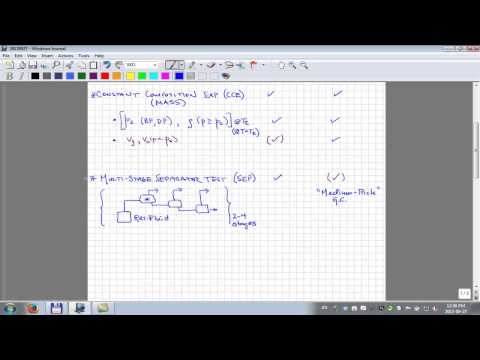

In [2]:
#@title  PVT tests 1
#@markdown An overview of the primary PVT tests used to analyze reservoir fluids.  Information from chapter 6 of "Phase Behavior" SPE Monograph (Whitson and Brule)
from IPython.display import YouTubeVideo
YouTubeVideo('KVaaw2pcS5o', width=600, height=400)

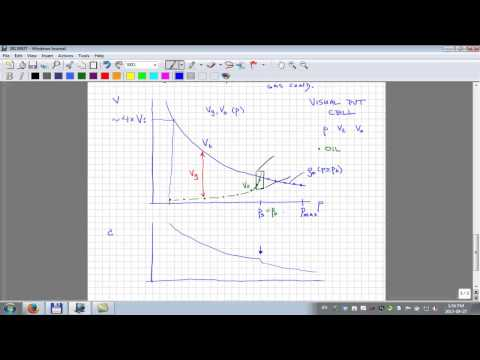

In [3]:
#@title  PVT tests 2
#@markdown An overview of the primary PVT tests used to analyze reservoir fluids.  Information from chapter 6 of "Phase Behavior" SPE Monograph (Whitson and Brule)
from IPython.display import YouTubeVideo
YouTubeVideo('MVEAI02aXmA', width=600, height=400)

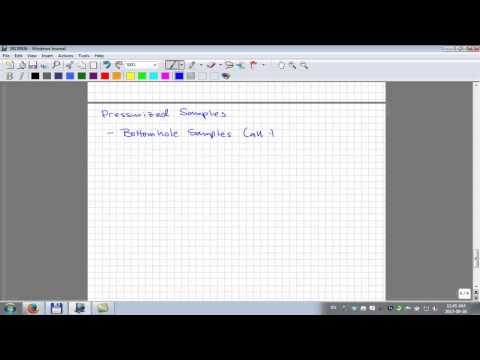

In [4]:
#@title  Sampling and PVT tests
#@markdown A lecture on sampling and the PVT laboratory tests used on reservoir fluids.  Information from chapter 6 of "Phase Behavior" SPE Monograph (Whitson and Brule)
from IPython.display import YouTubeVideo
YouTubeVideo('L2xy_nVpHok', width=600, height=400)

# Simulation of PVT experiments using NeqSim
In the following sections we will demonstrate how PVT experiments can be simulated in NeqSim using the built in methods.

The computational implementation in Java can be seen in GIT:

https://github.com/equinor/neqsim/tree/master/src/main/java/neqsim/PVTsimulation/simulation

We will do the PVT simulations in the following steps:

1. Create the fluid
2. Run viscosity simulations
3. Differential liberation
4. Constant-volume depletion (CVD)
5. Constant mass expansion (CME)
6. GOR calculations
7. Swelling calculations




## 1. Create the fluid

We will select a pre-created fluid in neqsim, a black oil. We will the do a TPflash at standard conditions and show resulting composition, and calcualte the phase envelope of this fluid.

phase envelope for black oil
| 0                    | 1          | 2           | 3          | 4   | 5   | 6               |
|:---------------------|:-----------|:------------|:-----------|:----|:----|:----------------|
|                      | total      | GAS         | OIL        |     |     |                 |
| nitrogen             | 1.0846E-2  | 2.36326E-2  | 5.22341E-5 |     |     | [mole fraction] |
| CO2                  | 2.1692E-2  | 4.60247E-2  | 1.15166E-3 |     |     | [mole fraction] |
| methane              | 2.38612E-1 | 5.17526E-1  | 3.16768E-3 |     |     | [mole fraction] |
| ethane               | 1.19306E-1 | 2.50535E-1  | 8.52954E-3 |     |     | [mole fraction] |
| propane              | 5.42299E-2 | 1.03588E-1  | 1.25643E-2 |     |     | [mole fraction] |
| i-butane             | 1.0846E-2  | 1.74607E-2  | 5.26218E-3 |     |     | [mole fraction] |
| n-butane             | 1.30152E-2 | 1.88224E-2  | 8.11307E-3 |     |     | [mole fraction] |
| i-pentane          

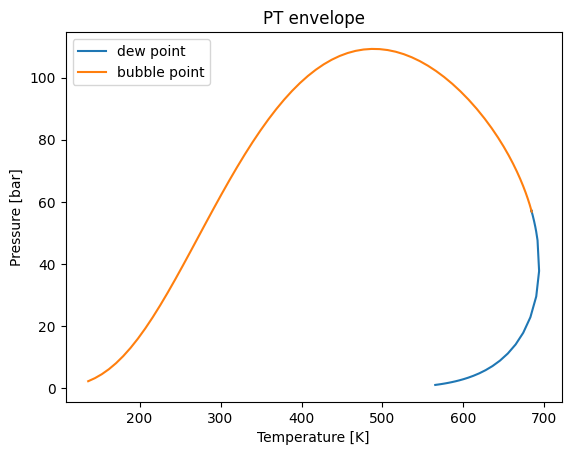

<java object 'neqsim.thermodynamicoperations.ThermodynamicOperations'>

In [5]:
fluid1 = createfluid('black oil')
print('phase envelope for black oil')
TPflash(fluid1)
printFrame(fluid1)
phaseenvelope(fluid1, True)

## 2. Simulation of gas and oil viscosity
The principal factors affecting viscosity are:

* Oil composition
* Temperature
* Dissolved gas
* Pressure

Viscosity increases with decreases in crude oil API gravity (assuming a constant Watson characterization factor) and decreases in temperature. The effect of solution gas is to reduce viscosity. Above saturation pressure, viscosity increases almost linearly with pressure.

<Figure size 640x480 with 0 Axes>

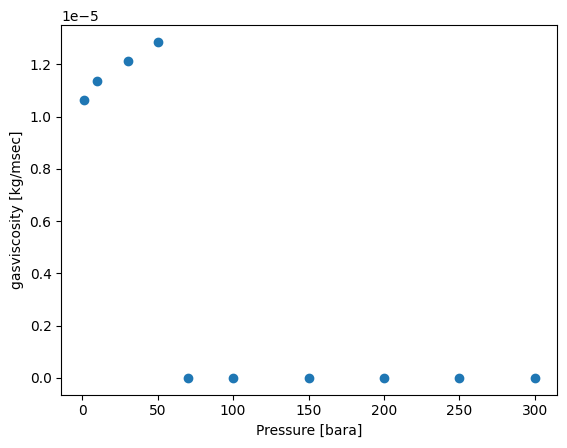

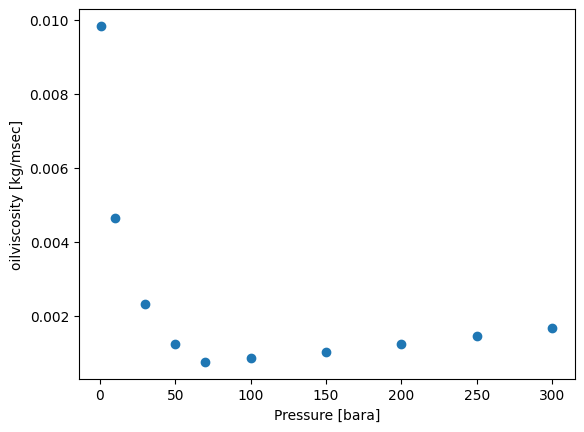

<Figure size 640x480 with 0 Axes>

In [6]:
fluid1 = createfluid('black oil')
pressure = [300.0, 250.0, 200.0, 150.0, 100.0, 70.0, 50.0, 30.0, 10.0, 1.01325]
temperature = [301.0, 301.0, 301.0, 301.0, 301.0, 301.0, 301.0, 301.0, 301.0, 301.0]

gasviscosity = []
oilviscosity = []

viscositysim(fluid1,pressure,temperature,gasviscosity,oilviscosity)

plt.figure()
plt.plot(pressure, gasviscosity, "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('gasviscosity [kg/msec]')
plt.figure()
plt.plot(pressure, oilviscosity, "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('oilviscosity [kg/msec]')
plt.figure()

## 3. Differential liberation
In differential liberation, gas comes out of solution as pressure is gradually decreased, but is removed from the oil. When reservoir pressure drops below the bubblepoint, flash liberation dominates.

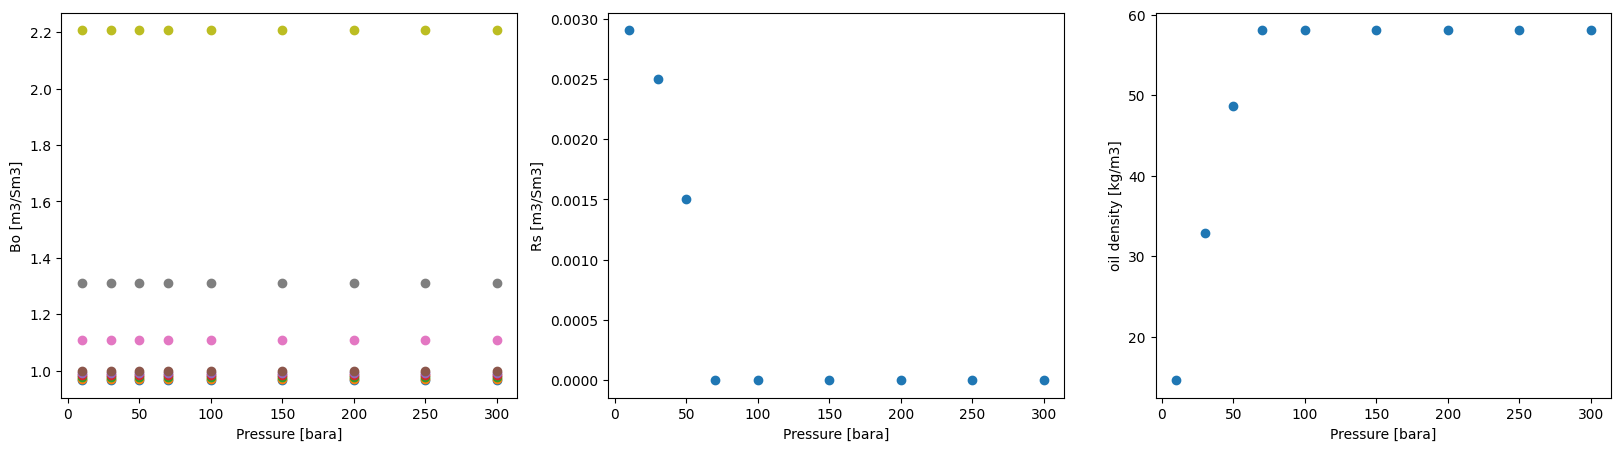

In [7]:
fluid1 = createfluid('black oil')
pressure = [300.0, 250.0, 200.0, 150.0, 100.0, 70.0, 50.0, 30.0, 10.0]
temperature = 301.0

Bo = []
Bg = []
relativegravity = []
Zgas =  []
gasstandardvolume = []
Rs = []
oildensity = []
relativegravity = []

difflib(fluid1,pressure,temperature,Bo, Bg,relativegravity,Zgas,gasstandardvolume,Rs, oildensity, relativegravity)


plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.plot(pressure, Bo, "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('Bo [m3/Sm3]')
plt.subplot(132)
plt.plot(pressure, Rs, "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('Rs [m3/Sm3]')
plt.subplot(133)
plt.plot(pressure, oildensity, "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('oil density [kg/m3]')
plt.show()

## 4. Constant-volume depletion (CVD)
Constant-volume depletion (CVD) experiments are performed on gas condensates and volatile oils to simulate reservoir depletion performance and compositional variation. ... The temperature of the PVT cell is maintained at the reservoir temperature T throughout the experiment.

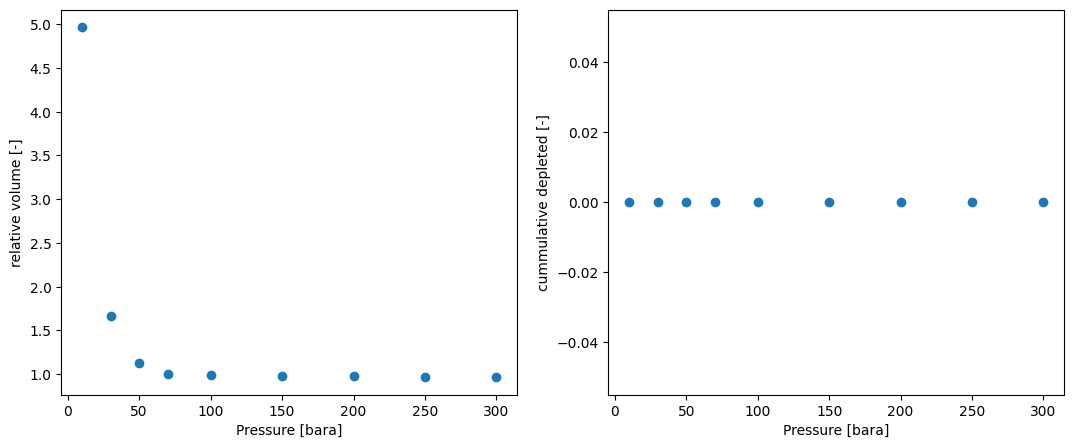

In [8]:
fluid1 = createfluid('black oil')
pressure = [300.0, 250.0, 200.0, 150.0, 100.0, 70.0, 50.0, 30.0, 10.0]
temperature = 301.0

relativevolume = []
liquidrelativevolume = []
Zgas =  []
Zmix = []
cummulativemolepercdepleted = []

CVD(fluid1,pressure,temperature,relativevolume, liquidrelativevolume,Zgas,Zmix,cummulativemolepercdepleted)
plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.plot(pressure, relativevolume, "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('relative volume [-]')
plt.subplot(132)
plt.plot(pressure, cummulativemolepercdepleted, "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('cummulative depleted [-]')
plt.show()


## 5. Constant mass expansion (CME)
The bubble point pressure is determined by an experiment called Constant Composition Expansion (CCE). It's also called Constant Mass Expansion (CME) experiment or Pressure-Volume (PV) relationship. ... The cell pressure is controlled by a positive displacement pump and recorded on an accurate pressure gauge.

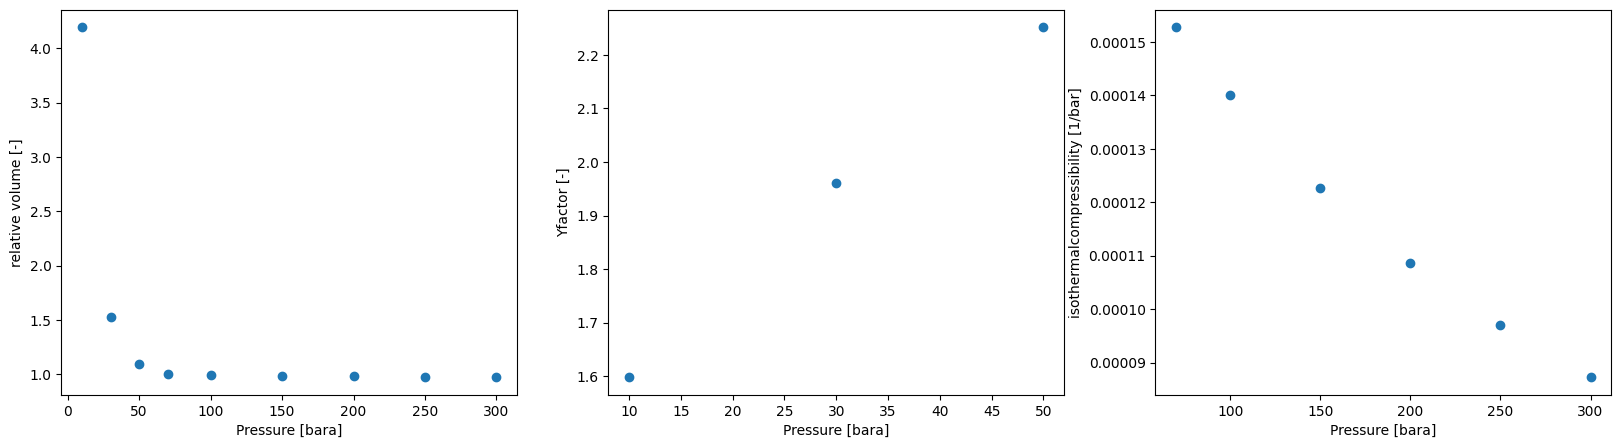

In [9]:
fluid1 = createfluid('black oil')
pressure = [300.0, 250.0, 200.0, 150.0, 100.0, 70.0, 50.0, 30.0, 10.0]
temperature = [301.0, 301.0, 301.0, 301.0, 301.0, 301.0, 301.0, 301.0, 301.0]

relativevolume = []
liquidrelativevolume = []
Zgas =  []
Yfactor = []
isothermalcompressibility = []
satPressure = None
CME(fluid1,pressure,temperature,satPressure,relativevolume, liquidrelativevolume,Zgas,Yfactor,isothermalcompressibility)

plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.plot(pressure, relativevolume, "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('relative volume [-]')
plt.subplot(132)
plt.plot(pressure, Yfactor, "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('Yfactor [-]')
plt.subplot(133)
plt.plot(pressure, isothermalcompressibility, "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('isothermalcompressibility [1/bar]')
plt.show()

## 6. Gas Oil Ratio
.....

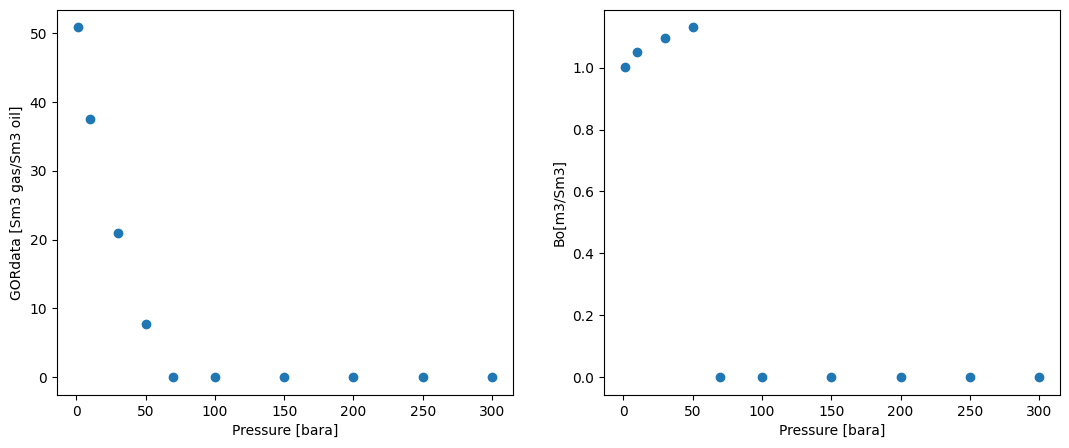

In [10]:
fluid1 = createfluid('black oil')
pressure = [300.0, 250.0, 200.0, 150.0, 100.0, 70.0, 50.0, 30.0, 10.0, 1.01325]
temperature = [301.0, 301.0, 301.0, 301.0, 301.0, 301.0, 301.0, 301.0, 301.0, 301.0]

GORdata = []
Bo = []
GOR(fluid1, pressure, temperature, GORdata, Bo)

plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.plot(pressure, GORdata, "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('GORdata [Sm3 gas/Sm3 oil]')
plt.subplot(132)
plt.plot(pressure, Bo, "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('Bo[m3/Sm3]')
plt.show()

## 7. Swelling test
A swelling/extraction test is a common phase behavior experiment to determine reservoir fluid volume and composition changes due to CO2 dissolution at reservoir temperature. The test is usually conducted in a constant volume, high pressure view cell initially filled with a predetermined amount of stock-tank oil.

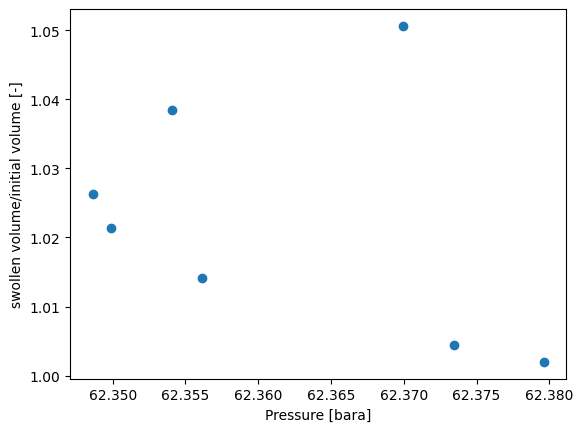

In [11]:
fluid1 = createfluid('black oil')
injectiongas = createfluid('CO2')
relativeoilvolume = []
pressure = []
fluid1.setPressure(100.0)
TPflash(fluid1)
temperature = 301.0
molPercentInjected = [0.0, 1.0, 5.0, 8.0, 10.0, 15.0, 20.0]
swellingtest(fluid1,injectiongas,temperature, molPercentInjected, pressure,relativeoilvolume)

plt.figure()
plt.plot(pressure, relativeoilvolume, "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('swollen volume/initial volume [-]')
plt.show()